# Skin Cancer Classification - Convolutional Network

### by ReDay Zarra

This project utilizes a convolutional network to **identify 9 different kinds of skin cancers** including melanoma, nevus, and more. The model is **trained on over 2,200 pictures of various skin cancers** based off of this [dataset](https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic). This model implements fundamental computer vision and classification techniques and includes a *step-by-step implementation of the model* as well as *in-depth notes to customize the model further* for higher accuracy.

## Importing the necessary libraries

Importing the essential **libraries for data manipulation and numerical analysis**. We will also need libraries for **data visualization and plotting**. Pickle will be used to **compress our folder of images** into train.p, valid.p, and test.p

In [271]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

import os
import pickle
import cv2

## Preparing the data

To begin training the model we need to **prepare our images** which are currently stored in our main folder "skin-cancers". These images need to be extracted and stored into variables for us to access. The variables will be manipulated to become our training, validation, and testing sets.

### Configure the data

In [272]:
train_dir = "skin-cancers/Train"
test_dir = "skin-cancers/Test"

> We will first **locate the images**. The 'skin-cancers' main folder holds two folders called Train and Test which hold many sub-folders. The **variables store the file path** to these two folders.

In [273]:
width = 144
height = 144

>Choose the **dimensions to resize the images** into 252 x 252 px to ensure all the images are the same size.

In [274]:
train_subfolders = os.listdir(train_dir)
test_subfolders = os.listdir(test_dir)

> Target the **location of the subfolders** which are stored in the variables above.

### Creating training set

In [275]:
X_train = []
y_train = []

In [276]:
for subfolder in train_subfolders:
    
    subfolder_path = os.path.join(train_dir, subfolder)
    images = os.listdir(subfolder_path)
    
    for image in images:
        image_path = os.path.join(subfolder_path, image)
        
        # Read the image and resize it
        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (width, height))
        
        # Append the resized image to the X_train list
        X_train.append(resized_img)
        
        # Append the subfolder name as the label for the image
        y_train.append(subfolder)

> **Iterate through the sub-folders** in the Train folder and look for images in the folder. For every image in the sub-folder, **store the image** file path and read it into the variable img. Next, **resize the image** with the width and height parameters and then **append them to X_train and Y_train**.

### Creating the testing set

In [277]:
X_test = []
y_test = []

In [278]:
for subfolder in test_subfolders:
    subfolder_path = os.path.join(test_dir, subfolder)
    images = os.listdir(subfolder_path)
    for image in images:
        image_path = os.path.join(subfolder_path, image)
        # Read the image and resize it
        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (width, height))
        # Append the resized image to the X_test list
        X_test.append(resized_img)
        # Append the subfolder name as the label for the image
        y_test.append(subfolder)

> **Repeat the process** of iterating through the sub-folders **for the Test folder** and append the images to X_test and y_test.

### Creating validation set

The validation set can be **created with by using sci-kit learn's train_test_split()** function because we can simply **divide the training set** that we already have. I have chosen to **assign 20% of my training set** to my validation set. The validation data is then **stored separately in valid.p** file.

In [279]:
from sklearn.model_selection import train_test_split

# Split the train data into a validation set, using a 80/20 split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

### Creating the dataset files

> Use the training, testing, and validation dataset variables to **store the images in .p files**. The .dump() method from pickle allows you to create train.p, test.p, and valid.p and store the X and y variables in them.

In [280]:
with open("train.p", "wb") as f:
    pickle.dump((X_train, y_train), f)
    
with open("test.p", "wb") as f:
    pickle.dump((X_test, y_test), f)
    

with open('valid.p', 'wb') as f:
    pickle.dump((X_validation, y_validation), f)

### Convert to arrays

In [281]:
import numpy as np

# Convert the list of image data into a numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

> In order to manipulate the data any further, the training, testing, and validation **datasets need to be converted into arrays**. The .array() method from NumPy allows an simple way to do just that.

## Checking the dimensions of the dataset

Before processing the data, it is necessary to make sure the dataset and the variables we have stored them in are correct. We can easily see the shape of the 

In [282]:
X_train.shape

(1791, 144, 144, 3)

In [283]:
y_train.shape

(1791,)

In [284]:
X_test.shape

(118, 144, 144, 3)

In [285]:
y_test.shape

(118,)

In [286]:
X_valid.shape

(448, 144, 144, 3)

In [287]:
y_valid.shape

(448,)

## Verifying the images

Using **matplotlib to display** a randomly chosen image and see if it matches with its label, **just to see what the images are** and how the network will be classifying them.

In [288]:
i = 1

'nevus'

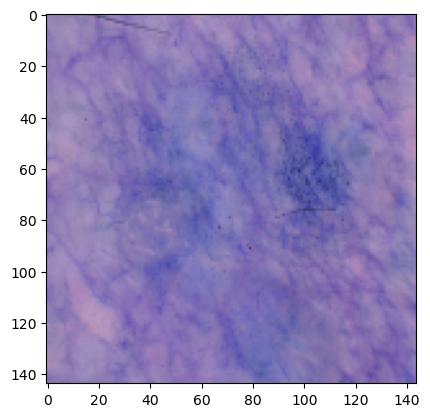

In [289]:
plt.imshow(X_train[i])
y_train[i]

'actinic keratosis'

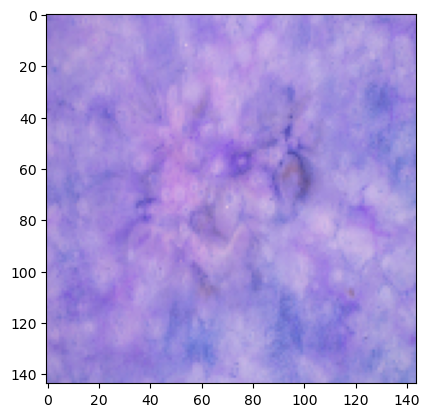

In [290]:
plt.imshow(X_test[i])
y_test[i]

'dermatofibroma'

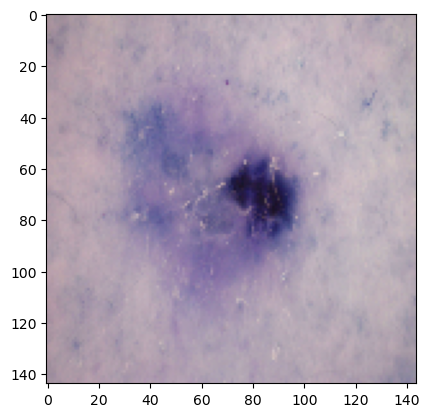

In [291]:
plt.imshow(X_valid[i])
y_valid[i]

## Processing the images

Preparing the data by **transforming the images so they are simpler for the network to understand**. Such as 
transforming the images from **RBG to grayscale (changes the depth from 3 to 1)**. I 
will also **perform data normalization**, where instead of using the pixel values 
ranging from 0 to 255, we can lower the range to use a more restricted range of
pixel values. The **data needs to also be shuffled** so the images do not get trained
in a certain order, we do not want the network to learn the order of these images.
We want to make it as hard as possible for the network to learn, which is why we
use low-quality images, more restricted pixel range, and grayscale images.

### Shuffling the images

Used the shuffle function to reassign the variables of X_train and y_train into a different order, however the labels still correspond to the correct images because the shuffle function reorders them the same way

In [292]:
from sklearn.utils import shuffle

In [293]:
X_train, y_train = shuffle(X_train, y_train)

### RGB to GrayScale

In [294]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True)

> Use numpy to **average the pixels to get the grayscale version** of the image. We will simply add the pixel values from the three color channels (Red, Green, and Blue) and then divide them by 3. 

In [295]:
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid / 3, axis = 3, keepdims = True)

In [296]:
X_train_gray.shape

(1791, 144, 144, 1)

> The **input depth is now 1** because we have divided the channels by 3.

'vascular lesion'

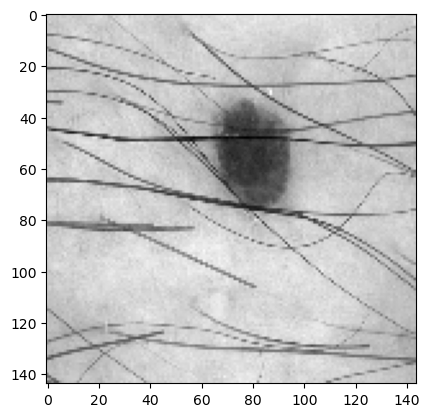

In [297]:
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
y_train[i]

'actinic keratosis'

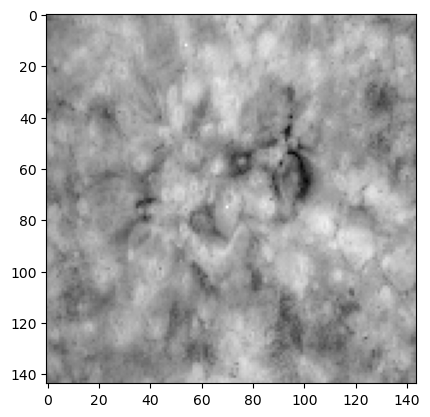

In [298]:
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
y_test[i]

'dermatofibroma'

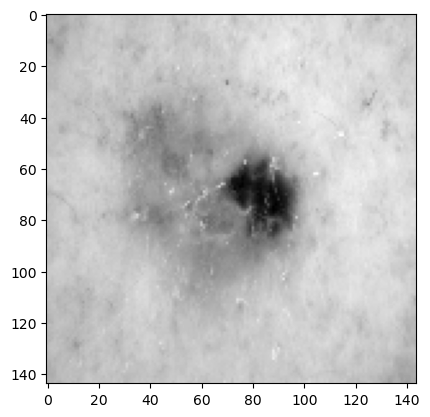

In [299]:
plt.imshow(X_valid_gray[i].squeeze(), cmap = 'gray')
y_valid[i]

### Normalizing the data

**Normalization is restricting the pixel value scale for each dataset**. It is important because we want all our **pixels in a similar range** so the weight at one part of the image is not a lot more than the weight at another part of an image.

In [300]:
X_train_gray_norm = (X_train_gray - 128) / 128

> There are many kinds of normalization methods. This one works by **subtracting the image pixels by 128** because we want to center the data from its range of 0 to 255 (256 total, so half is 128). We then **divide by 128** to so the data is between -1 to 1.

In [301]:
X_test_gray_norm = (X_test_gray - 128) / 128
X_valid_gray_norm = (X_valid_gray - 128) / 128

'vascular lesion'

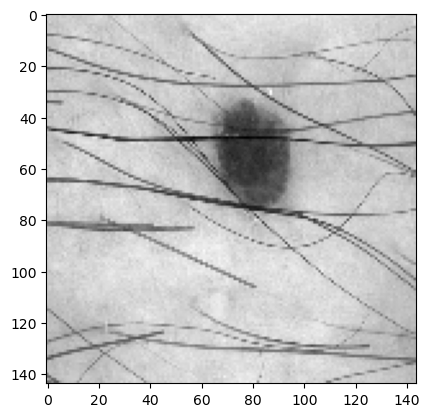

In [302]:
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
y_train[i]

'actinic keratosis'

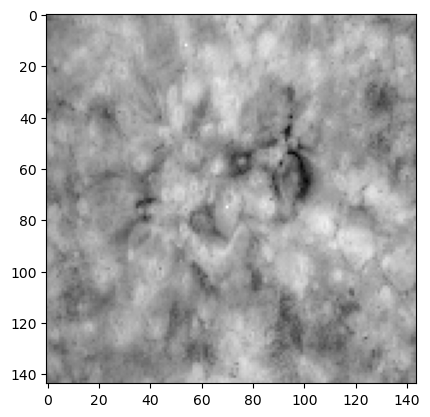

In [303]:
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')
y_test[i]

'dermatofibroma'

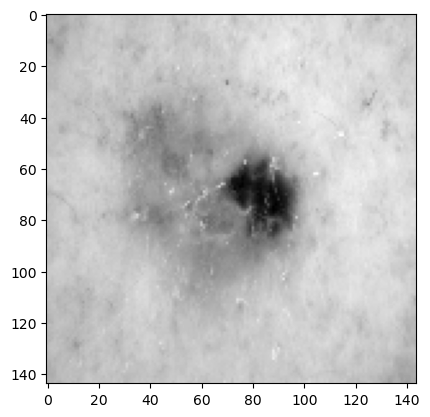

In [304]:
plt.imshow(X_valid_gray_norm[i].squeeze(), cmap = 'gray')
y_valid[i]

### Encoding the dependent variables

The neural network expects the output to be numeric so we will simply use sci-kit learn's label encoder to **encode the classes from words to numbers**. The skin cancers are encoded to the following:

0. Actinic keratosis

1. Basal cell carcinoma

2. Dermatofibroma

3. Melanoma

4. Nevus

5. Pigmented benign keratosis

6. Seborrheic keratosis

7. Squamous cell carcinoma
 
8. Vascular lesion

In [305]:
from sklearn.preprocessing import LabelEncoder

> Import the LabelEncoder class from sci-kit learn to **encode the categorical data in lexicographic order** because the order of the classes is not important.

In [306]:
y_train

array(['melanoma', 'vascular lesion', 'vascular lesion', ...,
       'pigmented benign keratosis', 'pigmented benign keratosis',
       'melanoma'], dtype='<U26')

> **Before encoding** the dependent variables from the training test **are words**.

In [307]:
labler = LabelEncoder()
y_train = labler.fit_transform(y_train)

> Use the **.fit_transform() method** from the LabelEncoder class **to apply the encoder** to the dependent variables from training data.

In [308]:
y_test = labler.fit_transform(y_test)
y_valid = labler.fit_transform(y_valid)

In [309]:
y_train

array([3, 8, 8, ..., 5, 5, 3], dtype=int64)

> The classes are now encoded to numbers as specified above.

## Building the neural network

To train the model we will implement six fundamental steps that will ensure we have
correctly implemented the **LeNet-5 architecture**. The original LeNet-5 architecture
was proposed by Yann LeCun and he developed it to recognize handwritten numbers. 
The dataset with the handwritten numbers is called the MNIST dataset and we will
be working with that in some different project. 

For our use, we will need to cutomize the LeNet architecture a bit because we have
more classes (or types of things) to differentiate from. Yann LeCun had 10 classes 
which were numbers ranging from 0 to 1, while we have **9 different kind of cancers**.

### Importing the essential Keras classes

In [350]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

### First Convolutional Layer

For our first step, we will take our input image (which is 252 x 252 x 1) and **apply 6 filters** that are 5 x 5 with input depth of 3. The output of these filters will be 
248 x 248 x 6 after the image has been processed through it. This is because there is 
an equation the ouptut has to follow that applies when we run images to filters: 

> **Output = ((Input - Filter) + 1) / Stride**

the equation above returns 28 by: 

> **Output = ((252 - 5) + 1) / 1 = 248**

The **stride is simply how much the kernel is shifted by each time when it passes over the image.** The kernel is essentially a feature map that scans the image by essentially gliding over it. The stride is how much the kernel shifts, so a **stride of 1 means that the kernel is moving 1px at a time** which is slow. While a stride of 2 means its moving 2px each time.

The **output depth is determined by the number of filters we apply**, since we applied
six filters the output of the image after the filters have been applied becomes
248 x 248 x 6.

Then we need to **apply a ReLU function on the output**. The rectified linear 
unit, or ReLU, an activation function simply takes in input and **converts all negative numbers 
into 0's while maintaining all the positive numbers**.

Finally, a **pooling layer (or subsampling layer) will be applied to simply shrink 
the feature map by 2**. This means the output depth will remain the same (the output
from the filters is still maintained), however the size of the output will be 
divided from 248 to 124. The result of the pooling layer is 124 x 124 x 6.

In [351]:
model = Sequential()

In [352]:
model.add(Conv2D(filters = 6, 
                 kernel_size = (5,5), 
                 activation = 'relu', 
                 input_shape = (144, 144, 1)))

> Use the Sequential class .add method to start building. The **Conv2D is class is then called to build the first convolution layer**, it takes 4 parameters. The first parameter is the **number of filters** which we know is 6. The **kernel_size is the size of the filters** which we know is 5 x 5 so we input the tuple (5,5). We specify the **activation function as 'relu'** to ensure ReLU is used. The final parameter is the **input shape which will be the shape of the image** so the tuple (252, 252, 1)

#### Pooling and Padding Layer

In [353]:
model.add(MaxPooling2D())

> **Apply max pooling** which takes the **pixel with the highest value** from the pooling window and discards the rest. This **reduces the dimensions of the image by half**, meaning the output is reduced from 248 x 248 to 124 x 124, however, the **depth stays the same**.

### Second Convolutional Layer

For our second step, we will simply repeat the process above but implementing some slight changes. We will take the output from the previous convolutional layer, which was 124 x 124 x 6 and then **apply 16 filters**. The filters will follow the same equation from above:

> **Output = ((124 - 5) + 1) / 1 = 120**

The **stride is 1px** (kernel is shifting by 1px each time) and because we have applied 16 filters, the **output of the filters will be 120 x 120 x 16**.

Similar to the previous layer, we **apply a ReLU funciton** which will simply *convert all the negative values into 0's*.

A subsampling layer aka **pooling layer is applied** to reduce the size of the images by 2. Meaning the images are shrunk down from 120 x 120 to 60 x 60, however the output depth from the filters has not changed. This means that the **output after the second convolutional layer is 60 x 60 x 16**.

In [354]:
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))

In [355]:
model.add(MaxPooling2D())

### Flatten Layer

The **flatten layer is simply used to convert** our matrix of data, which in our case is 60 x 60 x 16 **into a single array** so 57,600 x 1. This array *basically stores the individual pixels of an image in a single line*. It is important to flatten our data because the fully connected layers expects a one-dimensional vector of data as input. 

In [356]:
model.add(Flatten())

### First Dense Layer

A fully connected layer or a **dense layer is simply a layer that connects all of the
nodes from it's layer to all of the nodes in the next layer**. Dense layers are often
used at the end of neural networks because they *allow the network to learn the 
complex mapping from the input to the output data*. They function by receiving 
input from all of the nodes and then multiplying weights and adding biases to each
input value. These values are then passed down to the next dense layer which adds 
its own weights and biases. The **network learns to control these weights and biases
so that it can eventually make highly accurate predictions**.

In our case, the **first dense layer will have 57,600 nodes** which will each be assigned a 
pixel from our 57,600 x 1 flattened vector. The nodes will then connect to a second 
layer which only has 17,280 nodes (or neurons). The **dense layer will then apply a ReLU activation function to the output** before sending it off to the next layer.

In [357]:
model.add(Dense(units = 17424, activation = 'relu'))
model.add(Dropout(0.5))

In [358]:
model.add(Dense(units = 10000, activation = 'relu'))
model.add(Dropout(0.5))

### Second Dense Layer

The second dense layer is similar to the first. It will **take the input from the 17,280 nodes** from the previous layer, **manipulate the input with its own weights & biases, and then pass on the output to the next layer**.

The second dense layer will have 17,280 nodes to recieve the input from the previous layer and then it's output will be passed on to another dense layer with 756 nodes. The dense layer will then **apply a ReLU activation function to the output** before sending it off to the next layer.

In [359]:
model.add(Dense(units = 5000, activation = 'relu'))
model.add(Dropout(0.5))

In [360]:
model.add(Dense(units = 500, activation = 'relu'))
model.add(Dropout(0.5))

### Third Dense Layer

The third and **final dense layer will recieve input from the previous layer with its 756 nodes**. This layer will be **responsible for manipulating the input recieved and sending it to the final output layer**. The dense layer will then **apply a ReLU activation function to the output** before sending it off to the output layer.

Our **output layer needs to have nodes equal to the number of classes**. In the MNIST experiment, Yann LeCun only had 10 classes because he was trying to recognize the handwritten digits 0 to 9. However, we are trying to classify 9 different kinds of cancers so our **output layer needs to have 9 nodes**. One node for class, or type of cancer. 

In [361]:
model.add(Dense(units = 9, activation = 'softmax'))

## Compiling the model

To train the model, we will **first have to compile it**. We will use the .compile 
method from the Sequential class. The method accepts the following classes which
are used to compile and train the model effeciently: **loss, optimizer, and metrics**.

In [362]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = Adam(learning_rate = 0.001), 
              metrics = ['accuracy'])

## Training the model

Finally, to train the model we will use the .fit method from the Sequential class. This class has a number of parameters that we will need to address for the network to train effeciently, such as: **features training** dataset, **dependent variable training** dataset, **batch_size, epochs, verbose, validation_data**.

In [363]:
trainedmodel = model.fit(X_train_gray_norm,
                         y_train,
                         batch_size = 500,
                         epochs = 40,
                         verbose = 1,
                         validation_data = (X_valid_gray_norm, y_valid))

Epoch 1/40
4/4 [==============================] - 29s 6s/step - loss: 35.8489 - accuracy: 0.1424 - val_loss: 2.1902 - val_accuracy: 0.0737
Epoch 2/40
4/4 [==============================] - 21s 5s/step - loss: 2.1748 - accuracy: 0.1642 - val_loss: 2.1408 - val_accuracy: 0.1429
Epoch 3/40
4/4 [==============================] - 21s 5s/step - loss: 2.1220 - accuracy: 0.1647 - val_loss: 2.0994 - val_accuracy: 0.1920
Epoch 4/40
4/4 [==============================] - 21s 5s/step - loss: 2.0867 - accuracy: 0.1982 - val_loss: 2.0497 - val_accuracy: 0.2500
Epoch 5/40
4/4 [==============================] - 21s 5s/step - loss: 2.0866 - accuracy: 0.1937 - val_loss: 2.0472 - val_accuracy: 0.1942
Epoch 6/40
4/4 [==============================] - 22s 5s/step - loss: 2.0584 - accuracy: 0.1926 - val_loss: 1.9959 - val_accuracy: 0.2254
Epoch 7/40
4/4 [==============================] - 22s 5s/step - loss: 2.0225 - accuracy: 0.2172 - val_loss: 1.9433 - val_accuracy: 0.2902
Epoch 8/40
4/4 [=================

## Evaluating the model

In [364]:
score = model.evaluate(X_test_gray_norm, y_test)

4/4 [==============================] - 1s 146ms/step - loss: 5.5058 - accuracy: 0.3475


In [365]:
print("Test Accuracy: {}%".format(round(score[1] * 100, 2)))

Test Accuracy: 34.75%
